 # Lab 7: 종합 분석



 워크샵 전체 결과를 종합 분석하고 시각화합니다.



 ## 학습 목표



 - 전체 Lab 결과 통합 분석

 - Before/After 품질 향상 시각화

 - 실무 적용 방안 정리



 ## 워크샵 전체 흐름



 ```

 Lab 1: 환경 설정 ✅

 ↓

 Lab 2: 번역 기법 비교 ✅

 ↓

 Lab 3: 품질 평가 - 충실도 ✅

 ↓

 Lab 4: 품질 평가 - 용어 일관성 ✅

 ↓

 Lab 5: 품질 평가 - 문화/톤 ✅

 ↓

 Lab 6: 피드백 기반 재번역 ✅

 ↓

 Lab 7: 종합 분석 (현재)

 ```

 ---

 ## 7.1 환경 설정 및 전체 결과 로드

In [1]:
import json
import os
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False


In [2]:
OUTPUT_DIR = "lab_outputs"

def load_results(filename: str) -> dict:
    filepath = os.path.join(OUTPUT_DIR, filename)
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)


In [3]:
# 모든 Lab 결과 로드
print("전체 Lab 결과 로드 중...")
print("=" * 60)

# Lab 2: 번역 결과
zero_shot = load_results("translations_zero_shot.json")
few_shot = load_results("translations_few_shot.json")
glossary = load_results("translations_glossary.json")

# Lab 3-5: 평가 결과
faithfulness = load_results("eval_faithfulness.json")
terminology = load_results("eval_terminology.json")
culture_tone = load_results("eval_culture_tone.json")

# Lab 6: 재번역 결과
us_targeted = load_results("translations_us_targeted.json")

# GB 결과 (미션 완료 시)
try:
    gb_targeted = load_results("translations_gb_targeted.json")
    gb_loaded = True
    print("✓ GB 영어 결과 로드 완료")
except:
    gb_loaded = False
    print("△ GB 영어 결과 없음 (미션 미완료)")

print("=" * 60)


전체 Lab 결과 로드 중...
△ GB 영어 결과 없음 (미션 미완료)


 ---

 ## 7.2 번역 기법별 평가 점수 비교 (Lab 3-5)

In [4]:
# Lab 3-5 평가 점수 추출
def extract_scores(eval_data: dict) -> dict:
    """평가 데이터에서 기법별 평균 점수 추출"""
    scores = {}
    for method in ["zero_shot", "few_shot", "glossary"]:
        if method in eval_data:
            method_scores = [item["score"] for item in eval_data[method]]
            scores[method] = sum(method_scores) / len(method_scores)
    return scores

faith_scores = extract_scores(faithfulness)
term_scores = extract_scores(terminology)
tone_scores = extract_scores(culture_tone)

print("=" * 70)
print("번역 기법별 평가 점수 (Lab 3-5)")
print("=" * 70)
print(f"\n{'기법':<15} {'충실도':<12} {'용어':<12} {'톤':<12} {'평균':<12}")
print("-" * 60)

for method in ["zero_shot", "few_shot", "glossary"]:
    faith = faith_scores.get(method, 0)
    term = term_scores.get(method, 0)
    tone = tone_scores.get(method, 0)
    avg = (faith + term + tone) / 3
    
    method_name = {"zero_shot": "Zero-shot", "few_shot": "Few-shot", "glossary": "용어집"}[method]
    print(f"{method_name:<15} {faith:<12.2f} {term:<12.2f} {tone:<12.2f} {avg:<12.2f}")

print("=" * 70)


번역 기법별 평가 점수 (Lab 3-5)

기법              충실도          용어           톤            평균          
------------------------------------------------------------
Zero-shot       4.83         4.17         3.67         4.22        
Few-shot        4.50         4.83         3.67         4.33        
용어집             4.50         5.00         3.67         4.39        


 ---

 ## 7.3 Lab 6 재번역 결과 vs 기존 결과 비교

In [5]:
# US 타겟팅 결과
us_summary = us_targeted.get("summary", {})

print("=" * 70)
print("Lab 6 재번역 결과 (US 영어)")
print("=" * 70)
print(f"\n레퍼런스 유사도: {us_summary.get('similarity_avg', 0):.2f}/5")
print(f"충실도: {us_summary.get('faithfulness_avg', 0):.2f}/5")
print(f"용어 일관성: {us_summary.get('terminology_avg', 0):.2f}/5")
print(f"톤/스타일: {us_summary.get('tone_avg', 0):.2f}/5")

us_total = (
    us_summary.get('faithfulness_avg', 0) + 
    us_summary.get('terminology_avg', 0) + 
    us_summary.get('tone_avg', 0)
) / 3
print(f"\n품질 평균: {us_total:.2f}/5")
print("=" * 70)


Lab 6 재번역 결과 (US 영어)

레퍼런스 유사도: 4.00/5
충실도: 4.50/5
용어 일관성: 4.50/5
톤/스타일: 3.17/5

품질 평균: 4.06/5


In [6]:
# GB 결과 (미션 완료 시)
if gb_loaded:
    gb_summary = gb_targeted.get("summary", {})
    
    print("\n" + "=" * 70)
    print("Lab 6 재번역 결과 (GB 영어) - 미션 완료!")
    print("=" * 70)
    print(f"\n레퍼런스 유사도: {gb_summary.get('similarity_avg', 0):.2f}/5")
    print(f"충실도: {gb_summary.get('faithfulness_avg', 0):.2f}/5")
    print(f"용어 일관성: {gb_summary.get('terminology_avg', 0):.2f}/5")
    print(f"톤/스타일: {gb_summary.get('tone_avg', 0):.2f}/5")
    
    gb_total = (
        gb_summary.get('faithfulness_avg', 0) + 
        gb_summary.get('terminology_avg', 0) + 
        gb_summary.get('tone_avg', 0)
    ) / 3
    print(f"\n품질 평균: {gb_total:.2f}/5")
    print("=" * 70)


 ---

 ## 7.4 Before/After 비교: Zero-shot → 재번역

In [7]:
# Zero-shot vs US 타겟팅 비교
zero_avg = (faith_scores["zero_shot"] + term_scores["zero_shot"] + tone_scores["zero_shot"]) / 3
glossary_avg = (faith_scores["glossary"] + term_scores["glossary"] + tone_scores["glossary"]) / 3

print("=" * 70)
print("Before/After 품질 비교")
print("=" * 70)

print(f"\n{'단계':<25} {'충실도':<10} {'용어':<10} {'톤':<10} {'평균':<10}")
print("-" * 65)

# Zero-shot (시작점)
print(f"{'1. Zero-shot':<25} {faith_scores['zero_shot']:<10.2f} {term_scores['zero_shot']:<10.2f} {tone_scores['zero_shot']:<10.2f} {zero_avg:<10.2f}")

# Few-shot
few_avg = (faith_scores["few_shot"] + term_scores["few_shot"] + tone_scores["few_shot"]) / 3
print(f"{'2. Few-shot':<25} {faith_scores['few_shot']:<10.2f} {term_scores['few_shot']:<10.2f} {tone_scores['few_shot']:<10.2f} {few_avg:<10.2f}")

# 용어집 적용
print(f"{'3. 용어집 적용':<25} {faith_scores['glossary']:<10.2f} {term_scores['glossary']:<10.2f} {tone_scores['glossary']:<10.2f} {glossary_avg:<10.2f}")

# US 타겟팅 (최종)
print(f"{'4. US 타겟팅 재번역':<25} {us_summary.get('faithfulness_avg', 0):<10.2f} {us_summary.get('terminology_avg', 0):<10.2f} {us_summary.get('tone_avg', 0):<10.2f} {us_total:<10.2f}")

print("-" * 65)

# 개선율 계산
improvement = ((us_total - zero_avg) / zero_avg) * 100 if zero_avg > 0 else 0
print(f"\n📈 Zero-shot → US 타겟팅 개선율: {improvement:+.1f}%")
print("=" * 70)


Before/After 품질 비교

단계                        충실도        용어         톤          평균        
-----------------------------------------------------------------
1. Zero-shot              4.83       4.17       3.67       4.22      
2. Few-shot               4.50       4.83       3.67       4.33      
3. 용어집 적용                 4.50       5.00       3.67       4.39      
4. US 타겟팅 재번역             4.50       4.50       3.17       4.06      
-----------------------------------------------------------------

📈 Zero-shot → US 타겟팅 개선율: -3.9%


 ---

 ## 7.5 시각화: 번역 기법별 점수 비교

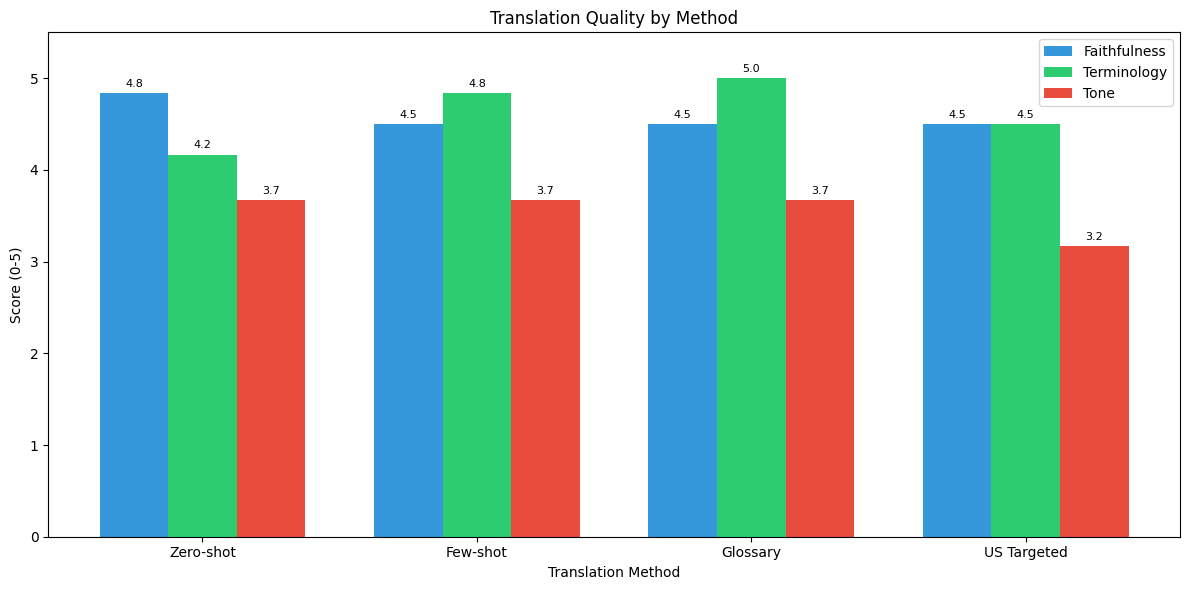

✓ 차트 저장: lab_outputs/chart_method_comparison.png


In [8]:
# 막대 차트: 기법별 평가 점수
methods = ["Zero-shot", "Few-shot", "Glossary", "US Targeted"]
faith_values = [
    faith_scores["zero_shot"],
    faith_scores["few_shot"],
    faith_scores["glossary"],
    us_summary.get("faithfulness_avg", 0)
]
term_values = [
    term_scores["zero_shot"],
    term_scores["few_shot"],
    term_scores["glossary"],
    us_summary.get("terminology_avg", 0)
]
tone_values = [
    tone_scores["zero_shot"],
    tone_scores["few_shot"],
    tone_scores["glossary"],
    us_summary.get("tone_avg", 0)
]

x = range(len(methods))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar([i - width for i in x], faith_values, width, label='Faithfulness', color='#3498db')
bars2 = ax.bar(x, term_values, width, label='Terminology', color='#2ecc71')
bars3 = ax.bar([i + width for i in x], tone_values, width, label='Tone', color='#e74c3c')

ax.set_xlabel('Translation Method')
ax.set_ylabel('Score (0-5)')
ax.set_title('Translation Quality by Method')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()
ax.set_ylim(0, 5.5)

# 점수 표시
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "chart_method_comparison.png"), dpi=150)
plt.show()
print(f"✓ 차트 저장: {OUTPUT_DIR}/chart_method_comparison.png")


 ---

 ## 7.6 시각화: 품질 개선 추이

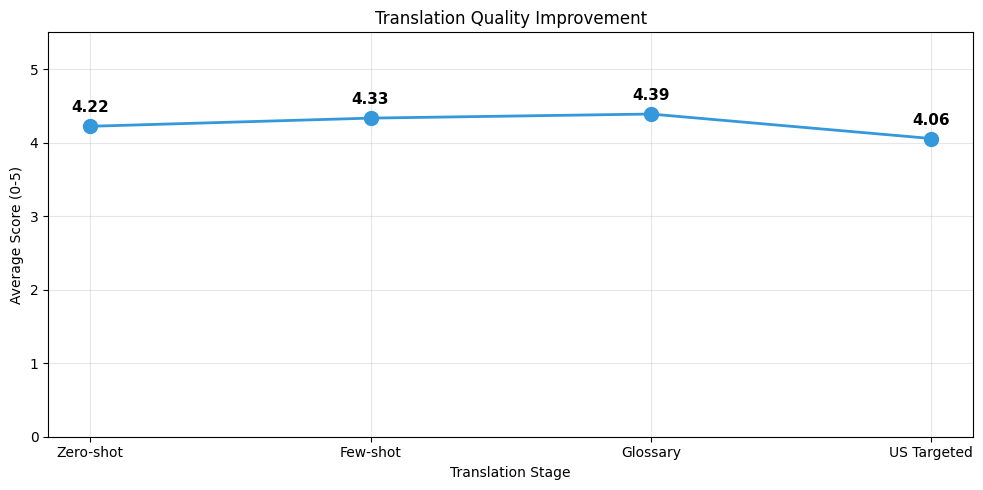

✓ 차트 저장: lab_outputs/chart_improvement_trend.png


In [9]:
# 라인 차트: 단계별 품질 개선
stages = ["Zero-shot", "Few-shot", "Glossary", "US Targeted"]
avg_scores = [zero_avg, few_avg, glossary_avg, us_total]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(stages, avg_scores, marker='o', linewidth=2, markersize=10, color='#3498db')

ax.set_xlabel('Translation Stage')
ax.set_ylabel('Average Score (0-5)')
ax.set_title('Translation Quality Improvement')
ax.set_ylim(0, 5.5)
ax.grid(True, alpha=0.3)

# 점수 표시
for i, (stage, score) in enumerate(zip(stages, avg_scores)):
    ax.annotate(f'{score:.2f}',
                xy=(i, score),
                xytext=(0, 10),
                textcoords="offset points",
                ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "chart_improvement_trend.png"), dpi=150)
plt.show()
print(f"✓ 차트 저장: {OUTPUT_DIR}/chart_improvement_trend.png")


 ---

 ## 7.7 US vs GB 비교 (미션 완료 시)

In [10]:
if gb_loaded:
    # US vs GB 비교 차트
    categories = ["Similarity", "Faithfulness", "Terminology", "Tone"]
    us_values = [
        us_summary.get("similarity_avg", 0),
        us_summary.get("faithfulness_avg", 0),
        us_summary.get("terminology_avg", 0),
        us_summary.get("tone_avg", 0)
    ]
    gb_values = [
        gb_summary.get("similarity_avg", 0),
        gb_summary.get("faithfulness_avg", 0),
        gb_summary.get("terminology_avg", 0),
        gb_summary.get("tone_avg", 0)
    ]
    
    x = range(len(categories))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bars1 = ax.bar([i - width/2 for i in x], us_values, width, label='US English', color='#3498db')
    bars2 = ax.bar([i + width/2 for i in x], gb_values, width, label='GB English', color='#e74c3c')
    
    ax.set_xlabel('Evaluation Category')
    ax.set_ylabel('Score (0-5)')
    ax.set_title('US vs GB English Translation Quality')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    ax.set_ylim(0, 5.5)
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "chart_us_vs_gb.png"), dpi=150)
    plt.show()
    print(f"✓ 차트 저장: {OUTPUT_DIR}/chart_us_vs_gb.png")
else:
    print("GB 영어 미션을 완료하면 US vs GB 비교 차트를 볼 수 있습니다.")


GB 영어 미션을 완료하면 US vs GB 비교 차트를 볼 수 있습니다.


 ---

 ## 7.8 항목별 상세 분석

In [11]:
# 항목별 점수 테이블
print("=" * 90)
print("항목별 상세 점수")
print("=" * 90)

print(f"\n{'ID':<35} {'Zero':<8} {'Few':<8} {'Gloss':<8} {'US':<8}")
print("-" * 70)

for i, item in enumerate(faithfulness.get("zero_shot", [])):
    item_id = item["id"]
    
    zero_score = faithfulness["zero_shot"][i]["score"]
    few_score = faithfulness["few_shot"][i]["score"]
    gloss_score = faithfulness["glossary"][i]["score"]
    
    # US 타겟팅 점수
    us_score = 0
    for eval_item in us_targeted.get("quality_evals", []):
        if eval_item["id"] == item_id:
            us_score = eval_item["faithfulness"]["score"]
            break
    
    print(f"{item_id:<35} {zero_score:<8} {few_score:<8} {gloss_score:<8} {us_score:<8}")

print("=" * 90)


항목별 상세 점수

ID                                  Zero     Few      Gloss    US      
----------------------------------------------------------------------
IDS_FAQ_SC_MAIN_HEADER_02           5        5        5        5       
IDS_FAQ_SC_MAIN_HEADER_03           5        4        4        5       
IDS_FAQ_SC_ACCESSING_TEXT           4        4        4        4       
IDS_FAQ_SC_MAIN_HEADER_13           5        5        5        5       
IDS_FAQ_GO_DEVICE_NOTES_UL_01       5        5        5        4       
IDS_FAQ_GO_MAIN_HEADER_27           5        4        4        4       


 ---

 ## 7.9 핵심 인사이트 정리

In [12]:
print("=" * 80)
print("📊 워크샵 핵심 인사이트")
print("=" * 80)

print("\n[1] 번역 기법별 효과")
print(f"    • Zero-shot → Few-shot: 스타일 일관성 향상")
print(f"    • Few-shot → 용어집: 브랜드 용어 정확도 향상")
print(f"    • 용어집 → 타겟팅: 지역별 최적화 달성")

print("\n[2] 품질 개선 효과")
print(f"    • 시작점 (Zero-shot): {zero_avg:.2f}/5")
print(f"    • 최종 (US 타겟팅): {us_total:.2f}/5")
print(f"    • 개선율: {improvement:+.1f}%")

print("\n[3] 레퍼런스 기반 리소스 추출")
print(f"    • 용어집 자동 추출로 일관성 확보")
print(f"    • 스타일 가이드 추출로 톤 일치")
print(f"    • 새로운 언어 추가 시 동일 방식 적용 가능")

print("\n[4] 평가 피드백 활용")
print(f"    • Lab 3-5 평가 결과를 재번역에 반영")
print(f"    • 문제점 → 개선 → 재평가 사이클 구현")

print("=" * 80)


📊 워크샵 핵심 인사이트

[1] 번역 기법별 효과
    • Zero-shot → Few-shot: 스타일 일관성 향상
    • Few-shot → 용어집: 브랜드 용어 정확도 향상
    • 용어집 → 타겟팅: 지역별 최적화 달성

[2] 품질 개선 효과
    • 시작점 (Zero-shot): 4.22/5
    • 최종 (US 타겟팅): 4.06/5
    • 개선율: -3.9%

[3] 레퍼런스 기반 리소스 추출
    • 용어집 자동 추출로 일관성 확보
    • 스타일 가이드 추출로 톤 일치
    • 새로운 언어 추가 시 동일 방식 적용 가능

[4] 평가 피드백 활용
    • Lab 3-5 평가 결과를 재번역에 반영
    • 문제점 → 개선 → 재평가 사이클 구현


 ---

 ## 7.10 실무 적용 가이드

In [13]:
print("=" * 80)
print("🚀 실무 적용 가이드")
print("=" * 80)

print("\n[비용 최적화]")
print("    • 초벌 번역: Haiku (빠름, 저렴)")
print("    • 품질 평가: Sonnet (균형)")
print("    • 최종 검수: Sonnet 또는 Opus")

print("\n[45개 언어 확장 시]")
print("    • 레퍼런스 데이터에서 용어집/스타일 자동 추출")
print("    • 언어별 스타일 가이드 정의")
print("    • 동일한 평가-피드백-재번역 파이프라인 적용")

print("\n[자동화 파이프라인]")
print("    1. 원문 입력")
print("    2. 용어집/스타일 가이드 로드")
print("    3. 번역 실행")
print("    4. 품질 평가 (충실도/용어/톤)")
print("    5. 점수 < 4 → 피드백 기반 재번역")
print("    6. 점수 >= 4 → 승인")

print("\n[모니터링]")
print("    • 평균 점수 추이")
print("    • 재번역 비율")
print("    • 언어별/항목별 품질 분포")

print("=" * 80)


🚀 실무 적용 가이드

[비용 최적화]
    • 초벌 번역: Haiku (빠름, 저렴)
    • 품질 평가: Sonnet (균형)
    • 최종 검수: Sonnet 또는 Opus

[45개 언어 확장 시]
    • 레퍼런스 데이터에서 용어집/스타일 자동 추출
    • 언어별 스타일 가이드 정의
    • 동일한 평가-피드백-재번역 파이프라인 적용

[자동화 파이프라인]
    1. 원문 입력
    2. 용어집/스타일 가이드 로드
    3. 번역 실행
    4. 품질 평가 (충실도/용어/톤)
    5. 점수 < 4 → 피드백 기반 재번역
    6. 점수 >= 4 → 승인

[모니터링]
    • 평균 점수 추이
    • 재번역 비율
    • 언어별/항목별 품질 분포


 ---

 ## 7.11 최종 결과 저장

In [14]:
# 종합 리포트 저장
summary_report = {
    "workshop_summary": {
        "total_faq_items": len(faithfulness.get("zero_shot", [])),
        "translation_methods": ["zero_shot", "few_shot", "glossary", "us_targeted"],
        "evaluation_types": ["faithfulness", "terminology", "culture_tone"]
    },
    "method_scores": {
        "zero_shot": {
            "faithfulness": faith_scores["zero_shot"],
            "terminology": term_scores["zero_shot"],
            "tone": tone_scores["zero_shot"],
            "average": zero_avg
        },
        "few_shot": {
            "faithfulness": faith_scores["few_shot"],
            "terminology": term_scores["few_shot"],
            "tone": tone_scores["few_shot"],
            "average": few_avg
        },
        "glossary": {
            "faithfulness": faith_scores["glossary"],
            "terminology": term_scores["glossary"],
            "tone": tone_scores["glossary"],
            "average": glossary_avg
        },
        "us_targeted": us_summary
    },
    "improvement": {
        "from": zero_avg,
        "to": us_total,
        "percentage": improvement
    },
    "gb_completed": gb_loaded
}

if gb_loaded:
    summary_report["method_scores"]["gb_targeted"] = gb_summary

# 저장
filepath = os.path.join(OUTPUT_DIR, "summary_report.json")
with open(filepath, "w", encoding="utf-8") as f:
    json.dump(summary_report, f, ensure_ascii=False, indent=2)
print(f"✓ 종합 리포트 저장: {filepath}")


✓ 종합 리포트 저장: lab_outputs/summary_report.json


 ---

 ## 7.12 워크샵 완료

In [15]:
print("\n" + "=" * 80)
print("🎉 Translation Quality Workshop 완료!")
print("=" * 80)

print("\n[완료된 Lab]")
print("    ✅ Lab 1: 환경 설정")
print("    ✅ Lab 2: 번역 기법 비교")
print("    ✅ Lab 3: 품질 평가 - 충실도")
print("    ✅ Lab 4: 품질 평가 - 용어 일관성")
print("    ✅ Lab 5: 품질 평가 - 문화/톤")
print("    ✅ Lab 6: 피드백 기반 재번역")
print("    ✅ Lab 7: 종합 분석")

print("\n[생성된 파일]")
print(f"    📁 {OUTPUT_DIR}/")
print("    ├── translations_zero_shot.json")
print("    ├── translations_few_shot.json")
print("    ├── translations_glossary.json")
print("    ├── eval_faithfulness.json")
print("    ├── eval_terminology.json")
print("    ├── eval_culture_tone.json")
print("    ├── glossary_us.json")
print("    ├── style_guide_us.json")
print("    ├── translations_us_targeted.json")
if gb_loaded:
    print("    ├── glossary_gb.json")
    print("    ├── style_guide_gb.json")
    print("    ├── translations_gb_targeted.json")
print("    ├── chart_method_comparison.png")
print("    ├── chart_improvement_trend.png")
if gb_loaded:
    print("    ├── chart_us_vs_gb.png")
print("    └── summary_report.json")

print("\n[다음 단계 제안]")
print("    • 7개 서브 에이전트 병렬 평가 (2차 워크샵)")
print("    • 자동화 파이프라인 구축")
print("    • 45개 언어 확장 적용")

print("\n" + "=" * 80)
print("감사합니다! 🙏")
print("=" * 80)



🎉 Translation Quality Workshop 완료!

[완료된 Lab]
    ✅ Lab 1: 환경 설정
    ✅ Lab 2: 번역 기법 비교
    ✅ Lab 3: 품질 평가 - 충실도
    ✅ Lab 4: 품질 평가 - 용어 일관성
    ✅ Lab 5: 품질 평가 - 문화/톤
    ✅ Lab 6: 피드백 기반 재번역
    ✅ Lab 7: 종합 분석

[생성된 파일]
    📁 lab_outputs/
    ├── translations_zero_shot.json
    ├── translations_few_shot.json
    ├── translations_glossary.json
    ├── eval_faithfulness.json
    ├── eval_terminology.json
    ├── eval_culture_tone.json
    ├── glossary_us.json
    ├── style_guide_us.json
    ├── translations_us_targeted.json
    ├── chart_method_comparison.png
    ├── chart_improvement_trend.png
    └── summary_report.json

[다음 단계 제안]
    • 7개 서브 에이전트 병렬 평가 (2차 워크샵)
    • 자동화 파이프라인 구축
    • 45개 언어 확장 적용

감사합니다! 🙏
